# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [1]:
#1

import pandas as pd

# Load the uploaded dataset
file_path = '/content/cars_hw.csv'
cars_df = pd.read_csv(file_path)

# Display basic information about the dataset
cars_df.info(), cars_df.head()

# Drop the redundant column and rename columns for consistency
cars_df = cars_df.drop(columns=['Unnamed: 0'])
cars_df.columns = cars_df.columns.str.lower()

# Convert 'no_of_owners' to numeric (1st -> 1, 2nd -> 2, etc.)
cars_df['no_of_owners'] = cars_df['no_of_owners'].str.extract('(\d)').astype(int)

# Convert categorical variables to category dtype
categorical_columns = ['make', 'color', 'body_type', 'fuel_type', 'transmission_type']
cars_df[categorical_columns] = cars_df[categorical_columns].apply(lambda col: col.astype('category'))

# Check for missing or duplicate values
missing_values = cars_df.isnull().sum()
duplicates = cars_df.duplicated().sum()

cars_df.info(), missing_values, duplicates


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------

(None,
 make                 0
 make_year            0
 color                0
 body_type            0
 mileage_run          0
 no_of_owners         0
 seating_capacity     0
 fuel_type            0
 transmission         0
 transmission_type    0
 price                0
 dtype: int64,
 84)

In [2]:
# Remove duplicate rows
cars_df = cars_df.drop_duplicates()

# Confirm the removal of duplicates
remaining_duplicates = cars_df.duplicated().sum()

# Summary statistics of numerical columns
summary_stats = cars_df.describe()

remaining_duplicates, summary_stats


(0,
          make_year   mileage_run  no_of_owners  seating_capacity         price
 count   892.000000    892.000000    892.000000        892.000000  8.920000e+02
 mean   2016.856502  41762.630045      1.159193          5.104260  7.176267e+05
 std       2.827560  24412.721808      0.378126          0.465781  3.512205e+05
 min    2011.000000   1117.000000      1.000000          4.000000  1.880000e+05
 25%    2015.000000  22585.000000      1.000000          5.000000  4.640000e+05
 50%    2017.000000  38198.500000      1.000000          5.000000  6.445000e+05
 75%    2019.000000  58002.500000      1.000000          5.000000  8.580000e+05
 max    2022.000000  99495.000000      3.000000          8.000000  2.941000e+06)

<ipython-input-3-dc868db079da>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='no_of_owners', data=cars_df, ax=axes[1, 1], palette="pastel")
<ipython-input-3-dc868db079da>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel_type', y='price', data=cars_df, ax=axes[0, 0], palette="muted")
<ipython-input-3-dc868db079da>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='body_type', y='price', data=cars_df, ax=axes[0, 1], palette="muted")
<ipython-input-3-dc868db079da>:25: FutureWarning: 

Passing `palette` without assigning `hue`

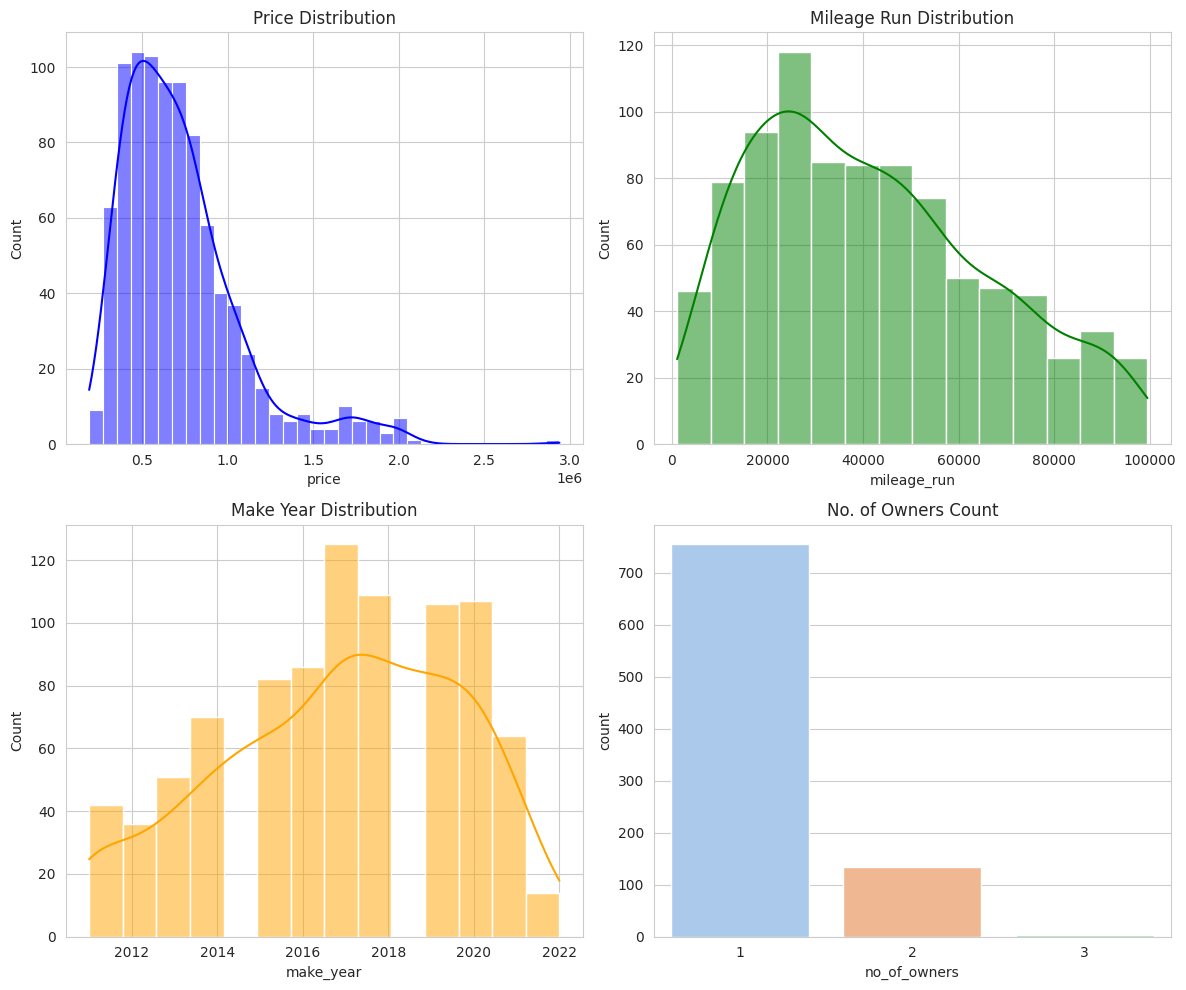

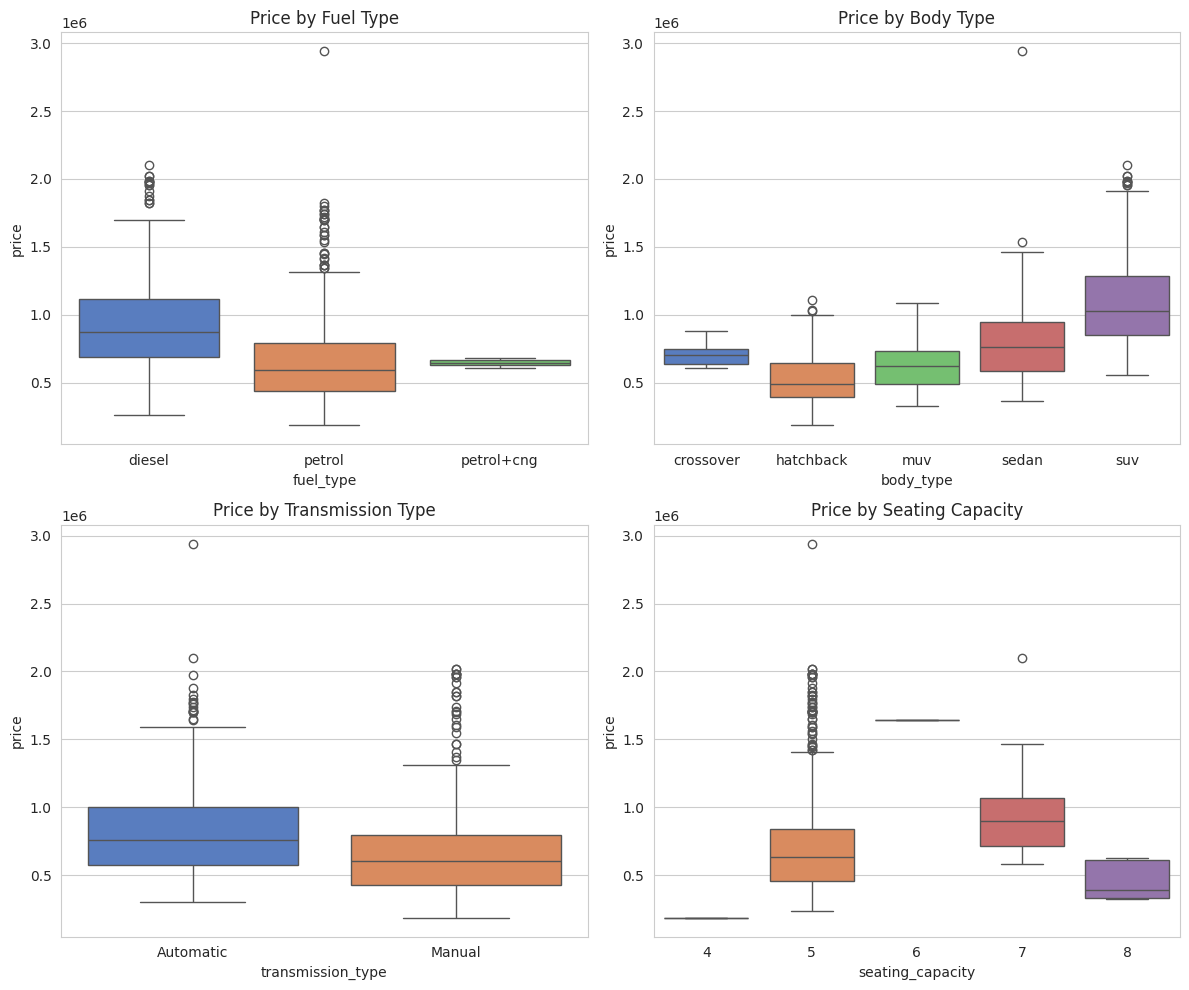

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style("whitegrid")

# Plot distributions for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(cars_df['price'], kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Price Distribution")
sns.histplot(cars_df['mileage_run'], kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Mileage Run Distribution")
sns.histplot(cars_df['make_year'], kde=True, ax=axes[1, 0], color="orange")
axes[1, 0].set_title("Make Year Distribution")
sns.countplot(x='no_of_owners', data=cars_df, ax=axes[1, 1], palette="pastel")
axes[1, 1].set_title("No. of Owners Count")
plt.tight_layout()

# Visualize categorical variables and their relationship with Price
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(x='fuel_type', y='price', data=cars_df, ax=axes[0, 0], palette="muted")
axes[0, 0].set_title("Price by Fuel Type")
sns.boxplot(x='body_type', y='price', data=cars_df, ax=axes[0, 1], palette="muted")
axes[0, 1].set_title("Price by Body Type")
sns.boxplot(x='transmission_type', y='price', data=cars_df, ax=axes[1, 0], palette="muted")
axes[1, 0].set_title("Price by Transmission Type")
sns.boxplot(x='seating_capacity', y='price', data=cars_df, ax=axes[1, 1], palette="muted")
axes[1, 1].set_title("Price by Seating Capacity")
plt.tight_layout()

plt.show()


In [4]:
#3
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = cars_df.drop(columns=['price'])
y = cars_df['price']

# Perform an 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the sizes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((713, 10), (179, 10), (713,), (179,))

In [5]:
#4
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


results = {}
features = ['make_year', 'mileage_run', 'no_of_owners', 'seating_capacity']  # Adjust based on your dataset

for feature in features:
    # Use a single feature for regression
    X_train_feat = X_train[[feature]]
    X_test_feat = X_test[[feature]]

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train_feat, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_feat)
    y_test_pred = model.predict(X_test_feat)

    # Calculate RMSE and R^2
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results
    results[feature] = {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R2': train_r2,
        'Test R2': test_r2
    }

# Print results
for feature, metrics in results.items():
    print(f"Feature: {feature}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()


Feature: make_year
  Train RMSE: 288363.21690637164
  Test RMSE: 339401.8261427463
  Train R2: 0.2759759650373601
  Test R2: 0.2641767530457614

Feature: mileage_run
  Train RMSE: 333412.3343481357
  Test RMSE: 384447.3736250482
  Train R2: 0.032086417353401786
  Test R2: 0.05589792594076026

Feature: no_of_owners
  Train RMSE: 334532.0174444405
  Test RMSE: 387217.7631495744
  Train R2: 0.025574503247296265
  Test R2: 0.042242197523436276

Feature: seating_capacity
  Train RMSE: 337493.67161063134
  Test RMSE: 393646.2938364108
  Train R2: 0.008244706100542065
  Test R2: 0.010177118895567494



In [9]:
#5
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# Define categorical and numerical features
categorical_features = ['make', 'fuel_type', 'body_type', 'transmission_type']
numerical_features = ['make_year', 'mileage_run', 'no_of_owners', 'seating_capacity']

# Create transformers
# Modified numerical transformer to use indices instead of column names
numerical_transformer = Pipeline(steps=[
    ('log_mileage', ColumnTransformer(
        transformers=[
            ('log', 'passthrough', list(range(len(numerical_features)))),  # Keep original numerical features using indices
            ('log_mileage_run', FunctionTransformer(np.log1p), [numerical_features.index('mileage_run')]),  # Log transform mileage_run using index
        ],
        remainder='drop'  # Drop other columns
    )),
    ('interaction', ColumnTransformer(
        transformers=[
            ('interaction', 'passthrough', list(range(len(numerical_features) + 1))), # Passthrough all features including log_mileage_run using indices
            # Interaction term using indices
            ('mileage_year_interaction', FunctionTransformer(lambda x: x[:, numerical_features.index('mileage_run')] * x[:, numerical_features.index('make_year')]), list(range(len(numerical_features) + 1))),
        ],
        remainder='drop'  # Drop other columns
    )),
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # One-hot encode categorical features
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate RMSE and R^2
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

ValueError: The output of the 'mileage_year_interaction' transformer should be 2D (numpy array, scipy sparse array, dataframe).